# Traffic Signs Recognition

## About Dataset
* Context
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

* Single-image, multi-class classification problem
* More than 40 classes
* More than 50,000 images in total
* Large, lifelike database

# İnserting of Libraries

In [1]:
#Data Manipulation
import pandas as pd

#Numerical Analysis
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Operating System
import os

#Deep Learning and Object Detection
import tensorflow as tf
import keras
import cv2

In [2]:
print("Tensorflow version {}".format(tf.__version__))
print("Keras version {}".format(keras.__version__))

Tensorflow version 2.17.0
Keras version 3.4.1


Extraction Data From Google Drive

In [3]:
import zipfile
#/content/drive/MyDrive/german_s.zip
#data path in my drive
with zipfile.ZipFile("/content/drive/MyDrive/german_s.zip", "r") as zipObj:
    zipObj.extractall("/content/data")

In [4]:
meta_df = pd.read_csv("/content/data/Meta.csv")
test_df = pd.read_csv("/content/data/Test.csv")
train_df = pd.read_csv("/content/data/Train.csv")


In [5]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


<ipython-input-6-6905ab93970f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


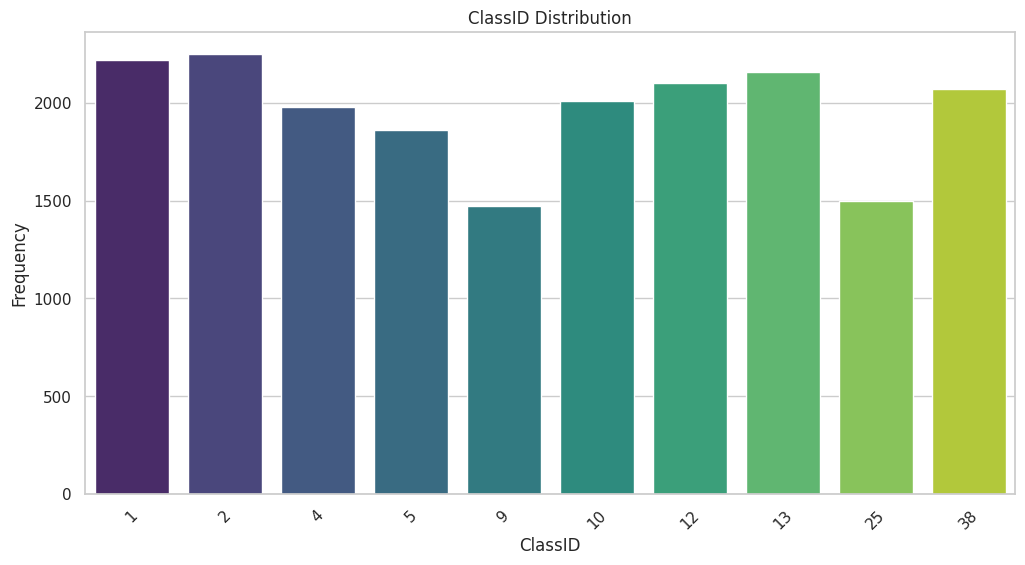

In [6]:
class_counts = train_df['ClassId'].value_counts().nlargest(10)


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


plt.title('ClassID Distribution')
plt.xlabel('ClassID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Sınıf id'lerini 45 derece döndürerek yerleştir
plt.show()


## Visulation of Random İmages From The Test Set

* selection random 20 images

In [7]:
import random
import matplotlib.image as mpimg

test_image_dir = "/content/data/Test"
image_files = [os.path.join(test_image_dir,file)for file in os.listdir(test_image_dir)]
random_images = random.sample(image_files,20)

* plot creation

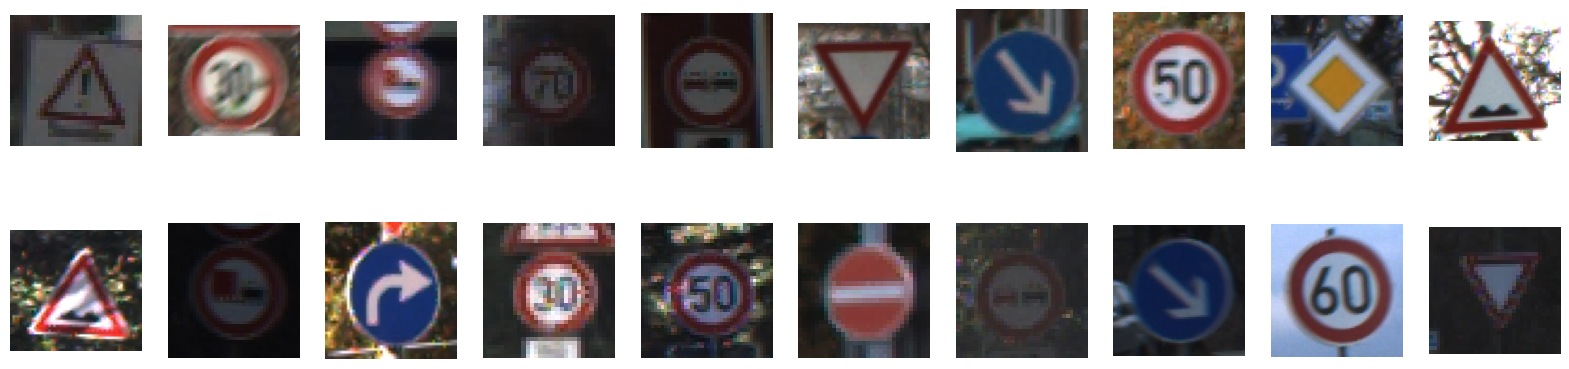

In [8]:
fig,axs = plt.subplots(2,10,figsize=(20,5))
for i, ax in enumerate(axs.flatten()):

  img = mpimg.imread(random_images[i])
  ax.imshow(img)
  ax.axis("off")

plt.show()


## Preparing data

In [9]:
import cv2
import glob

classes = 43
data = []
labels = []

for i in range(classes):
    path = os.path.join(os.getcwd(), "data", "train", str(i), "*.*")
    for f in glob.iglob(path):

        image = cv2.imread(f)
        if image is not None:

            image = cv2.resize(image, (30, 30))
            data.append(image)
            labels.append(i)


data = np.array(data)
labels = np.array(labels)

# Veri ve etiketlerin şekillerini yazdırma
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [10]:
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical


kf = KFold(n_splits=3,shuffle=True,random_state=36)

In [11]:
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]


y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


#CNN MODEL

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(30, 30, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = (3,3),  padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = (3,3),  padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units = 500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 43, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 15, 15, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         288,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 338,683 (1.29 MB)

 Trainable params: 338,683 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"acc"])

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="min"),
    ModelCheckpoint(filepath="mymodel.keras", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=False, verbose=1)
]


In [15]:
batch_size = 8
epochs = 35

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)


Epoch 1/35
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2938 - loss: 3.7528 - precision: 0.5482 - recall: 0.1519
Epoch 1: val_loss improved from inf to 0.77073, saving model to mymodel.keras
817/817 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - acc: 0.2940 - loss: 3.7508 - precision: 0.5485 - recall: 0.1521 - val_acc: 0.7778 - val_loss: 0.7707 - val_precision: 0.9021 - val_recall: 0.6352
Epoch 2/35
813/817 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7449 - loss: 0.8595 - precision: 0.8551 - recall: 0.6387
Epoch 2: val_loss improved from 0.77073 to 0.34167, saving model to mymodel.keras
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.7451 - loss: 0.8589 - precision: 0.8552 - recall: 0.6390 - val_acc: 0.8946 - val_loss: 0.3417 - val_precision: 0.9375 - val_recall: 0.8441
Epoch 3/35
814/817 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8589 - loss: 0.4795 - precision: 0.9067 - recall: 0.8134
Epoch 3: val_loss improved from 0.34167 to 0.22232, saving model to mymodel.keras
817/817 ━━━━━━━━━━━━━━━━

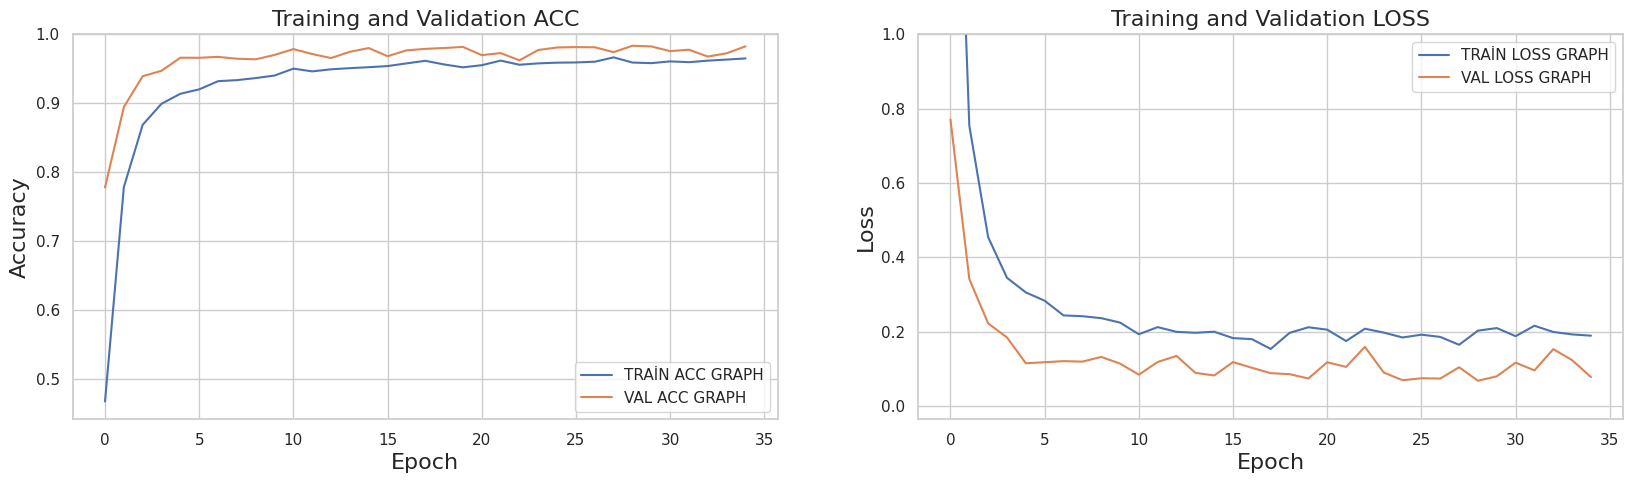

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["acc"],label="TRAİN ACC GRAPH")
plt.plot(history.history["val_acc"],label="VAL ACC GRAPH")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Validation ACC",fontsize=16)



plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="TRAİN LOSS GRAPH")
plt.plot(history.history["val_loss"],label="VAL LOSS GRAPH")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Validation LOSS",fontsize=16)
plt.show()